## Using linear regression to predict revenue of Icecream wrt the temperature  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('IceCreamData.csv')

In [3]:
d.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
d.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
d.isnull().values.any()
# no missing (nan) values in the datastet

False

In [7]:
d_n = d.head(25)

### Data Visualistion

[]

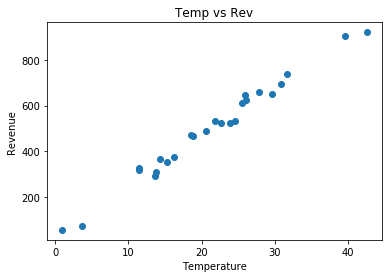

In [8]:
plt.scatter(d_n['Temperature'],d_n['Revenue'])
plt.title('Temp vs Rev')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.plot()

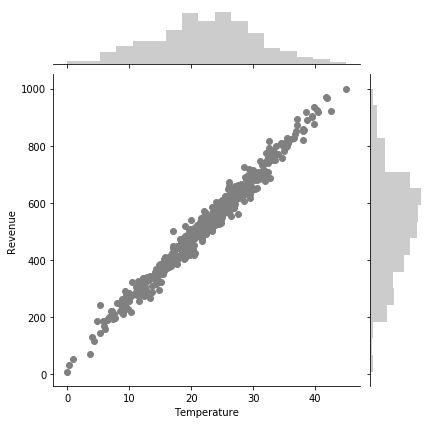

In [9]:
sns.jointplot(d['Temperature'], d['Revenue'], color = 'gray')

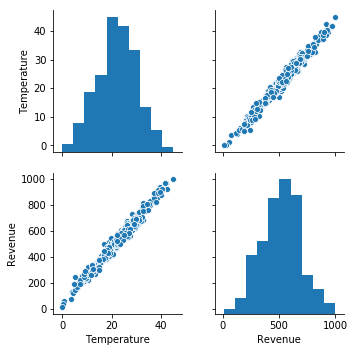

In [10]:
sns.pairplot(d)

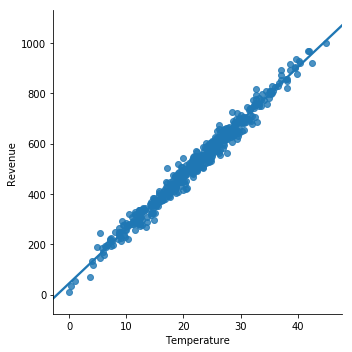

In [11]:
sns.lmplot(x = 'Temperature', y = 'Revenue', data = d)

### Training and Testing dataset 

In [12]:
X = d[['Temperature']]
y = d[['Revenue']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(335, 1) (335, 1) (165, 1) (165, 1)


### Training the model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
# by fir_intercept I'm asking resgressor to know there can be a y intercept. there is a b value to return in y = mx+b. otherwise,
#it would mean that the line is being forced to go throughthe origin
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("slope is ", (regressor.coef_))
print("intercept is ", (regressor.intercept_))

slope is  [[21.47218099]]
intercept is  [44.12830741]


### Testing the model

In [17]:
y_pred = regressor.predict(X_test)

In [22]:
y_pred

array([[681.94190167],
       [631.93787265],
       [559.13085679],
       [498.13711001],
       [615.18212148],
       [303.13595963],
       [284.12613449],
       [314.06612643],
       [505.52632457],
       [685.71649315],
       [724.14078282],
       [399.66356288],
       [430.56346674],
       [671.3245912 ],
       [ 49.86197447],
       [196.74164074],
       [522.41897592],
       [563.41018537],
       [583.42510634],
       [682.24966609],
       [555.70135268],
       [784.32096347],
       [655.33249987],
       [569.60480008],
       [913.19312858],
       [664.67845475],
       [314.42349181],
       [630.79816707],
       [731.32760274],
       [698.10093105],
       [434.04629658],
       [470.33479779],
       [710.41722934],
       [800.31926026],
       [640.85211021],
       [492.86932503],
       [745.19364711],
       [316.57656537],
       [260.92528725],
       [129.72765441],
       [582.14130418],
       [228.50881207],
       [546.73316561],
       [391

### Visualising Training set results

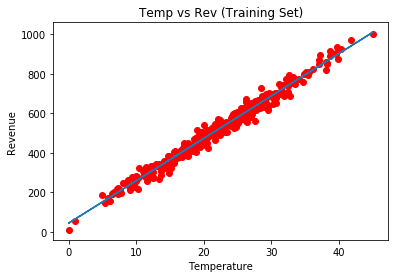

In [19]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Temp vs Rev (Training Set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

### Visualising test set reuslts

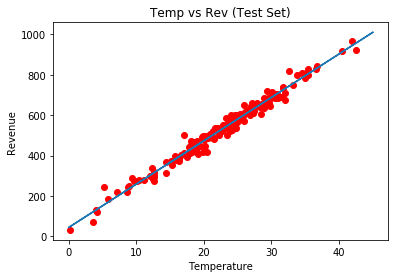

In [20]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train))
# didnot change the prediction line as we want to compare prediction made in training set how close they are in test set
plt.title('Temp vs Rev (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

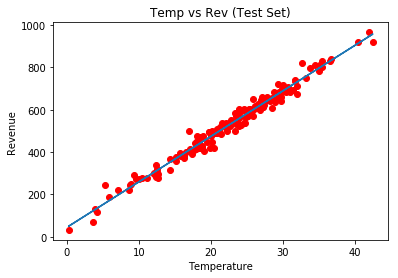

In [21]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test))

plt.title('Temp vs Rev (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

612.5736562767107

### Predicting a value

In [29]:
y_35 = regressor.predict(30)
print(y_35)

[[688.29373719]]
